# Lyft Trips Analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("lyft_analysis.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon
0,2014-09-04 09:51:00,40.64705,-73.77988
1,2014-08-27 21:13:00,40.74916,-73.98373
2,2014-09-04 14:16:00,40.64065,-73.97594
3,2014-09-04 16:08:00,40.75002,-73.99514
4,2014-08-28 02:41:00,40.76715,-73.98636


This data contains data about date and time, latitude and longitude

In [38]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time       Lat       Lon  Day  Weekday  Hour
0 2014-09-04 09:51:00  40.64705 -73.77988    4        3     9
1 2014-08-27 21:13:00  40.74916 -73.98373   27        2    21
2 2014-09-04 14:16:00  40.64065 -73.97594    4        3    14
3 2014-09-04 16:08:00  40.75002 -73.99514    4        3    16
4 2014-08-28 02:41:00  40.76715 -73.98636   28        3     2


C:\Users\venka\AppData\Local\Temp\ipykernel_14720\1438482754.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Day"])


<AxesSubplot:xlabel='Day', ylabel='Density'>

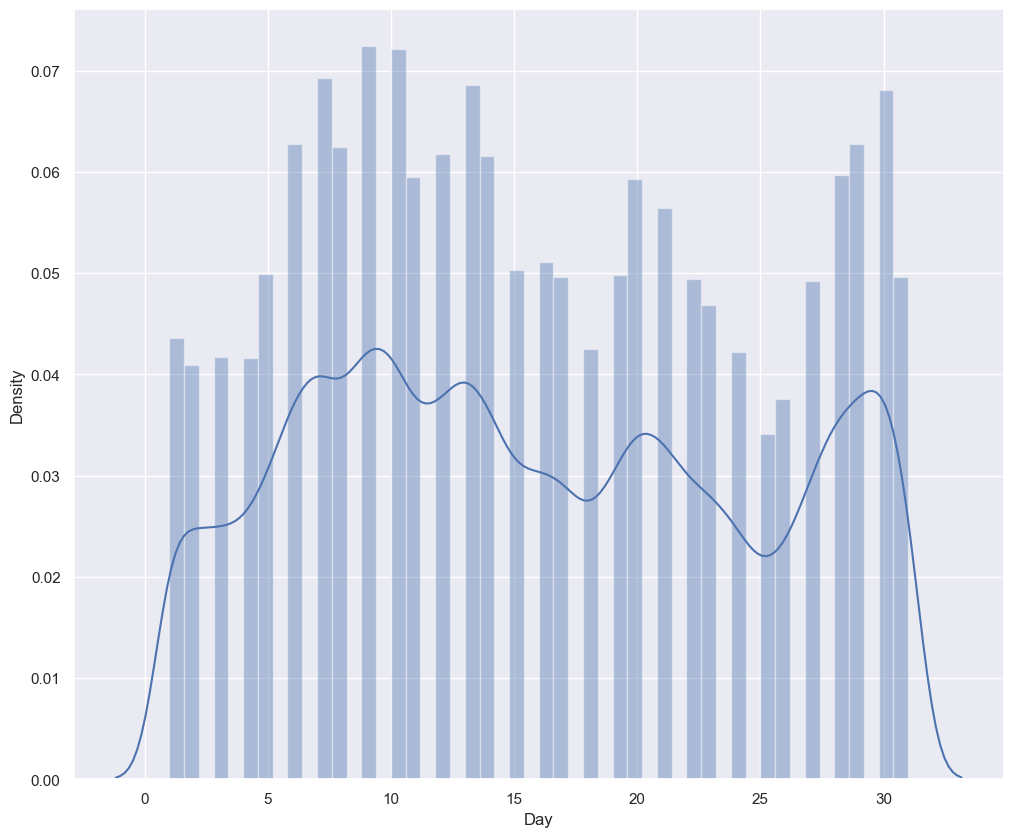

In [39]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

By looking at the daily trips we can say that the lyft trips are rising on the first two weeks of the month and decreases in the mid of the month and increases at the end.

C:\Users\venka\AppData\Local\Temp\ipykernel_14720\96630979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"])


<AxesSubplot:xlabel='Hour', ylabel='Density'>

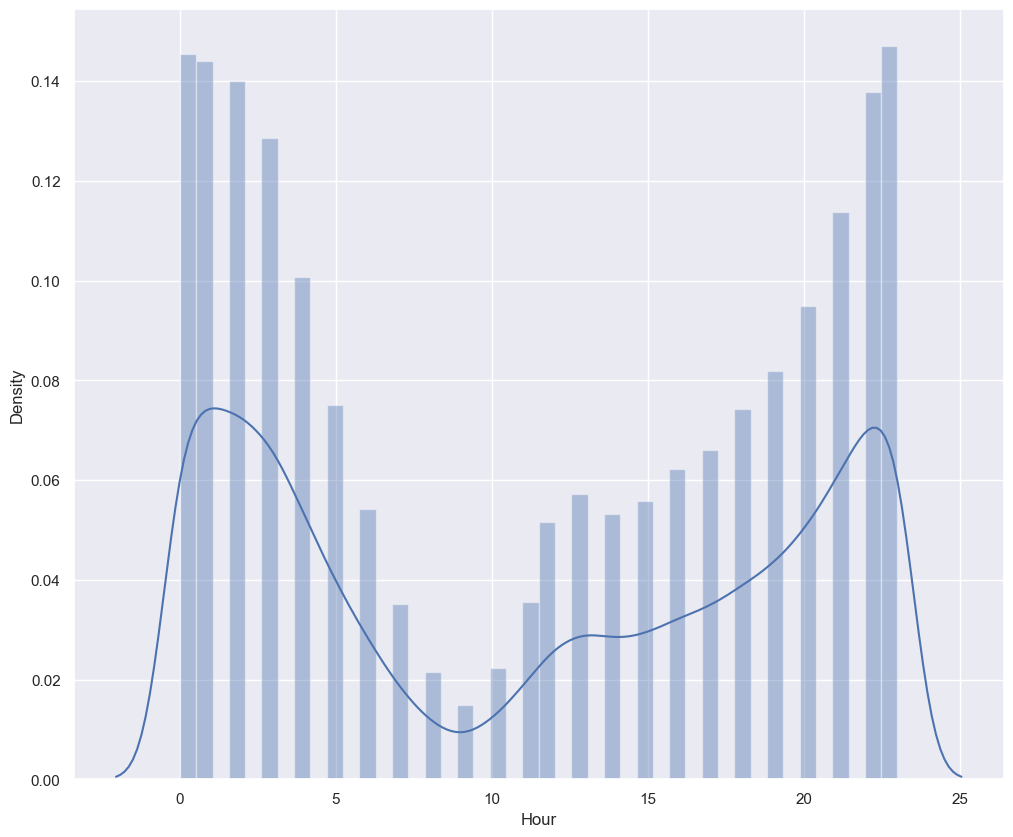

In [40]:
sns.distplot(data["Hour"])

According to the hourly data, the Uber trips increases after midnight and then decreasing after 5 am and the trips starts rising from 10am till the midnight, such that 11pm is the busiest hour for lyft then the trips start increasing.

C:\Users\venka\AppData\Local\Temp\ipykernel_14720\2809950383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekday"])


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

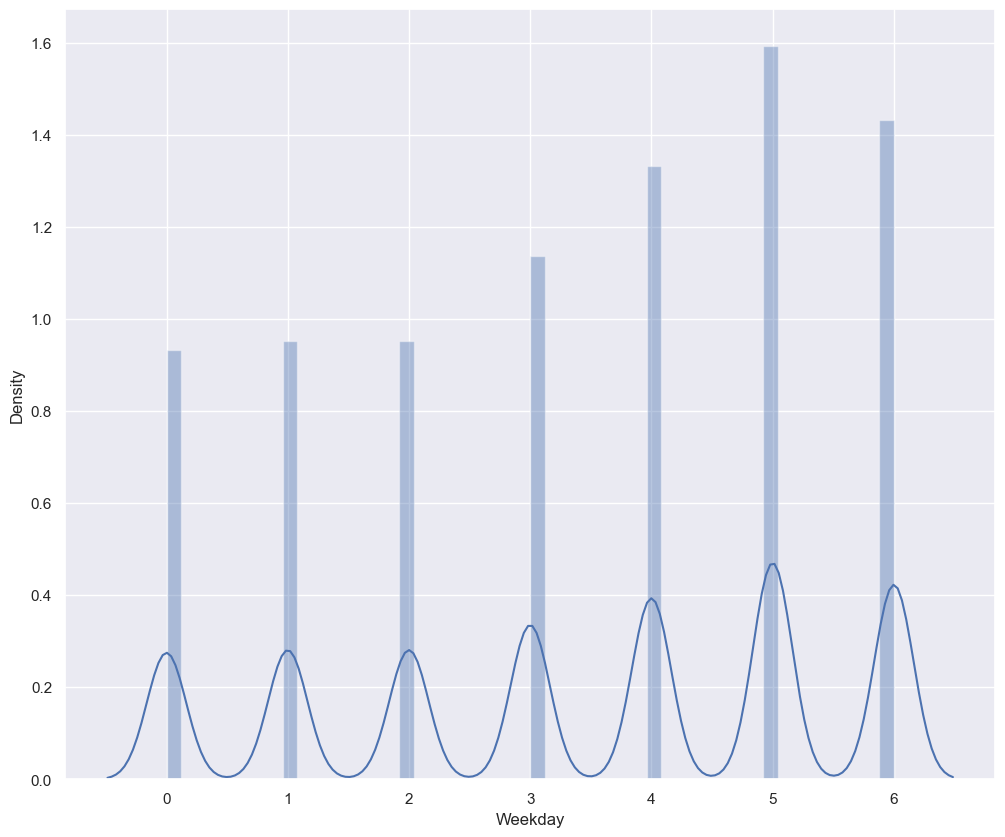

In [41]:
sns.distplot(data["Weekday"])

In the above figure it indicates, on Sundays and Saturdays we can say people use lyft for outings rather than for just going to work. Lyft generates revenue on the weekends than on weekdays.

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

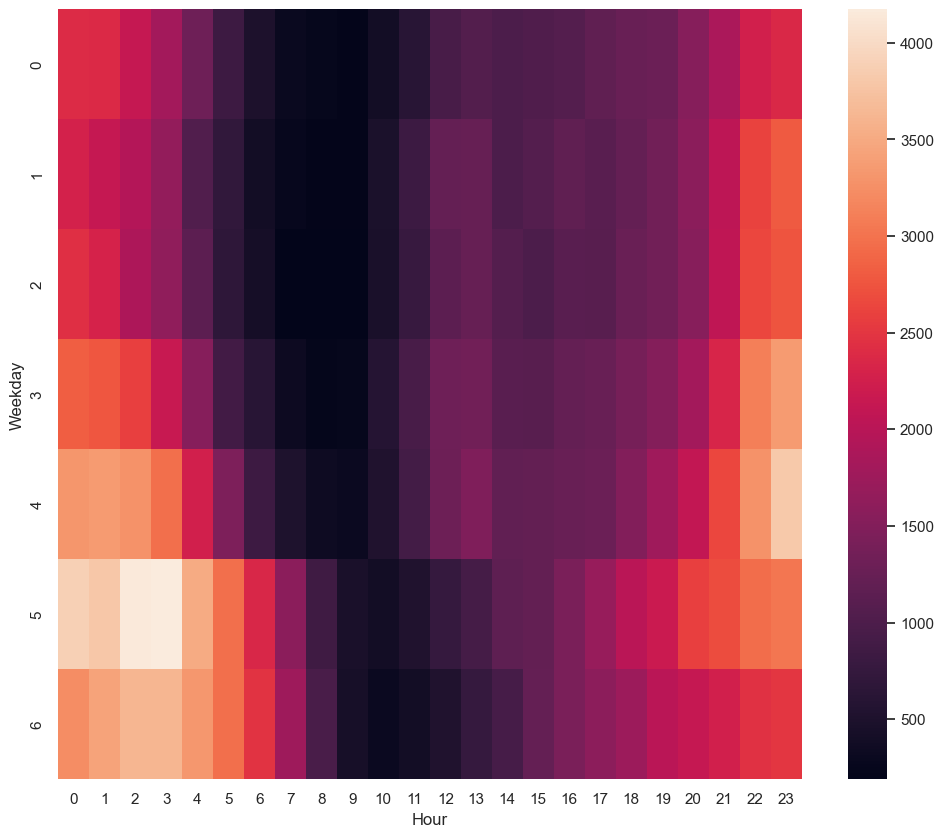

In [42]:

# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

The correlation between hours and weekdays on the lyft trips

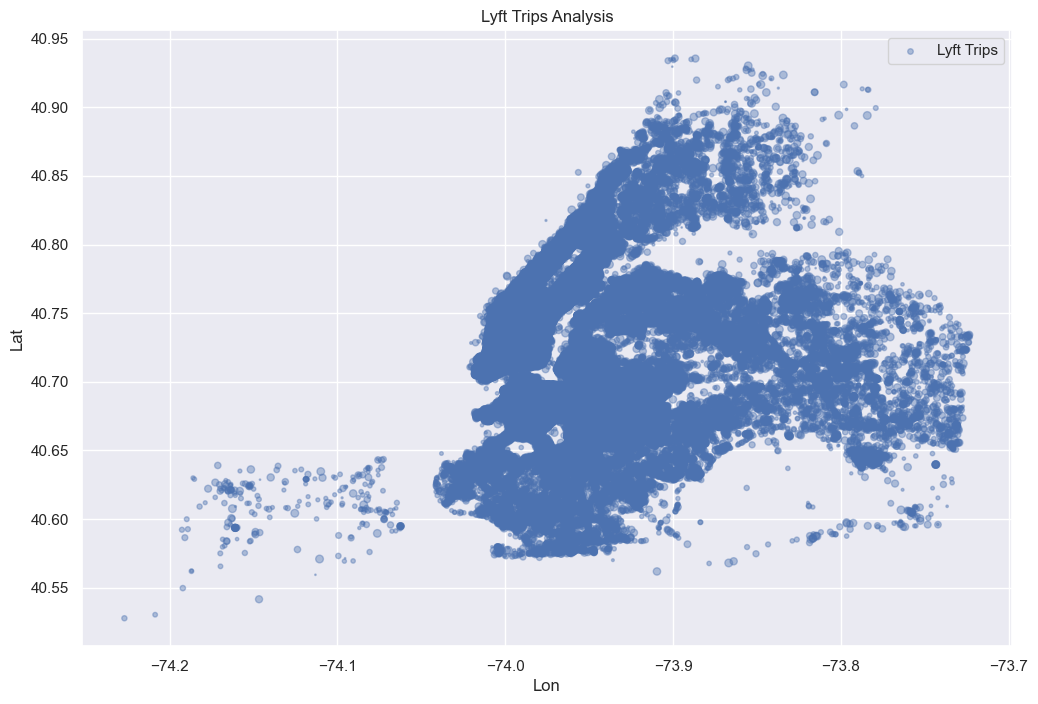

In [43]:

data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Lyft Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Lyft Trips Analysis")
plt.legend()
plt.show()

The density of lyft trips according to the regions of the New Your city